**Data Dictionary**

`Survived`: Survival (0 = No, 1 = Yes)    
`Pclass`  : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)   
`Sex`     : Sex	
`Age`     : Age in years	
`Sibsp`   :	# of siblings / spouses aboard the Titanic	
`Parch`   : # of parents / children aboard the Titanic	
`Ticket`  : Ticket number	
`Fare`    : Passenger fare	
`Cabin`   : Cabin number	
`Embarked`:	Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**The label is `Survived`**

In [256]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [257]:
df = pd.read_csv(r"I:/Jupyter/traintitanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Getting the shape, statistical features, null values and datatypes of the df.**

In [258]:
df.shape

(891, 12)

In [259]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Clearly, there are null values in three columns. One option is to drop rows accordingly, but the dataset is very minimal.**

**Get the precentage of null values for those columns**

In [261]:
df[['Age', 'Cabin', 'Embarked']].isnull().sum() * 100 / len(df)

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

**Since 77% of the values in column `Cabin` are NaNs, it would be very to impute them. The best course of action would be to drop the whole column.**

**Accordingly, dropping the `Cabin` column.**

In [262]:
df = df.drop("Cabin", axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**The column `Embarked` has only 2 NaN values, which are easy enough to impute with the most frequently occuring value.**

**Getting the count of the categorical value in the `Embarked` column and filling the NaN values**

In [263]:
df.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

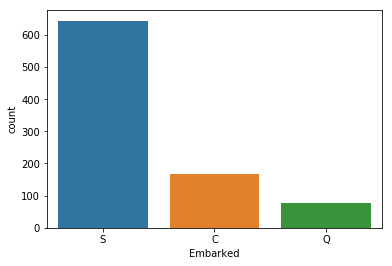

In [264]:
sns.countplot(x = 'Embarked', data = df)
plt.show()

In [265]:
df["Embarked"] = df["Embarked"].fillna("S")

**For age, there are 177 (19.86%) missing values. We will look at the histogram plot before deciding how to imput those values. Making an arbitrary decision can skew the data wrongly**

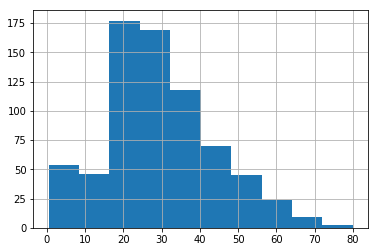

In [266]:
df["Age"].hist()
plt.show()

**Since `Age` is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. Thus, we'll use the median to impute the missing values.**

**Filling the NaN values in `Age` using the median value**

In [267]:
df["Age"].mean()

29.69911764705882

In [268]:
df["Age"].median()

28.0

In [269]:
df['Age'] = df["Age"].fillna(df["Age"].median())

**Both `SibSp` and `Parch` denote whether the person was travelling with the family. Thus, these two column can be combined into one categorical predictor `TravelAlone`**

In [270]:
df["TravelBuds"] = df["SibSp"] + df["Parch"]

df["TravelAlone"] = np.where(df["TravelBuds"] > 0, 0, 1)

In [271]:
df.drop(["SibSp", "Parch", "TravelBuds"], axis = 1, inplace = True)

In [272]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


**We can also go ahead and drop `PassengerId`, `Name` and `Ticket` as these features will not contribute to the machine learning algorithm.**

In [273]:
df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


**To get an idea of how the features contribute towards survival, we will do an exploratory data analysis of each feature with `Survived`**

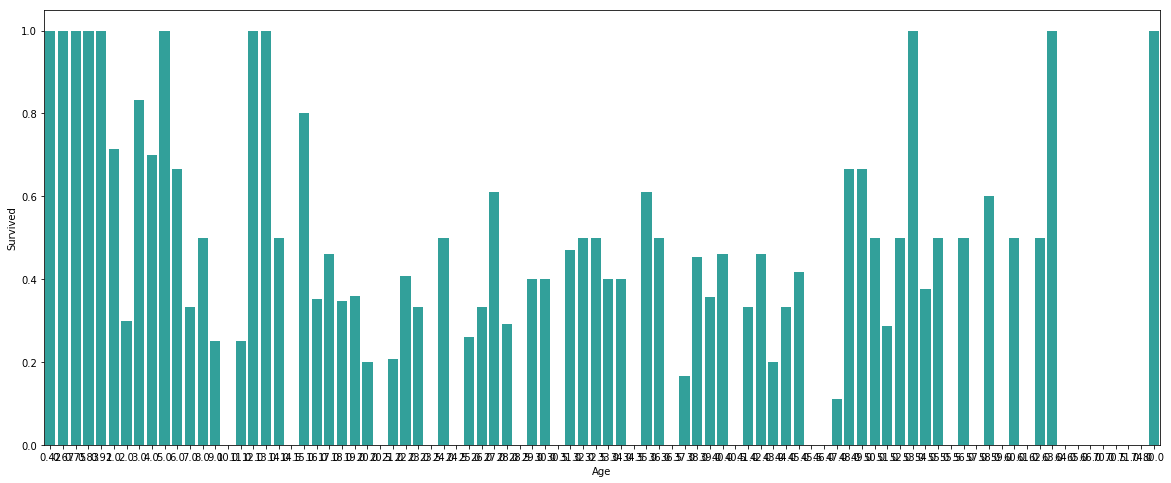

In [274]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Age', y = 'Survived', data = df[["Age", "Survived"]], color="LightSeaGreen", ci = None)
plt.show()

**We can see that those who were younger had a better chance of survival.**

**Getting the gender counts of those who survived versus those who didn't**

In [275]:
df.groupby(["Survived", "Sex"]).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

I:\Programs\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


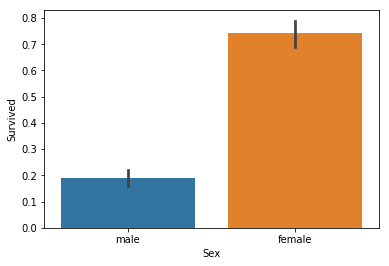

In [276]:
sns.barplot("Sex", "Survived", data = df)
plt.show()

**Clearly, females have a higher chance of survival**

**Doing the same for the rest of the features - `Pclass`, `Fare`, `Embarked` and `TravelAlone` and note your insights.**

I:\Programs\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


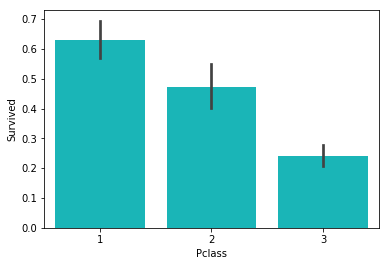

In [277]:
sns.barplot('Pclass', 'Survived', data = df, color="darkturquoise")
plt.show()

**A first class passenger unsurprisingly has a higher chance of survival.**

Many machine learning algorithms cannot operate on categorical data directly and often require all input variables and output variables to be numeric. Thus, this means that categorical data must be converted to a numerical form to be able to run an ML algorithm on it.

In [278]:
df = df.drop("Embarked", axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare,TravelAlone
0,0,3,male,22.0,7.2500,0
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,1
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


**One-hot encoding the categorical variable in the df.**

In [279]:
df = df.join(pd.get_dummies(df["Sex"]))
df = df.drop(["Sex", "female"], axis = 1)
df.head()

,Survived,Pclass,Age,Fare,TravelAlone,male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,0,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,0,0
4,0,3,35.0,8.0500,1,1
